<a href="https://colab.research.google.com/github/lengmousoul/TinyML/blob/main/TinyML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import math 

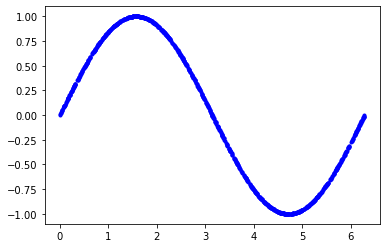

In [ ]:
SAMPLES = 1000
SEED = 1337 
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low = 0 ,high = 2*math.pi ,size = SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,'b.')
plt.show()


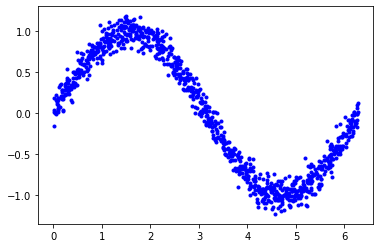

In [ ]:
#添加随机值 增添噪声的影响
y_values += 0.1 *np.random.randn(*y_values.shape)
plt.plot(x_values , y_values , "b.")
plt.show()


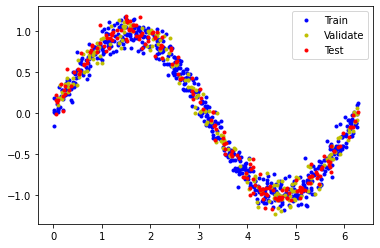

In [ ]:
TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int (0.2*SAMPLES+TRAIN_SPLIT)
TEST_SPLIT 
# 提供2个索引 ，数组被分成三段
x_train , x_validate , x_test = np.split(x_values, [TRAIN_SPLIT,TEST_SPLIT])
y_train , y_validate , y_test = np.split(y_values, [TRAIN_SPLIT,TEST_SPLIT])

assert(x_train.size+x_validate.size+ x_test.size)==SAMPLES

plt.plot(x_train,y_train , 'b.',label = "Train")
plt.plot(x_validate,y_validate , 'y.',label = "Validate")
plt.plot(x_test,y_test , 'r.', label ="Test")
plt.legend()
plt.show()


In [ ]:

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(16,activation= "relu",input_shape = (1,)))
model_1.add(tf.keras.layers.Dense(1))
model_1.compile(optimizer ='rmsprop', loss = 'mse',metrics =['mae'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(x_train , y_train, epochs=1000, batch_size=16 , validation_data=(x_validate , y_validate))


Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

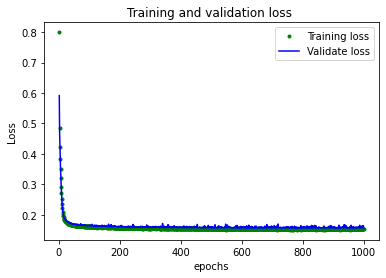

In [ ]:
#打印训练信息
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss) +1)
plt.plot(epochs , loss , 'g.',label = "Training loss")
plt.plot(epochs , val_loss , "b", label = "Validate loss")
plt.title("Training and validation loss ")
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

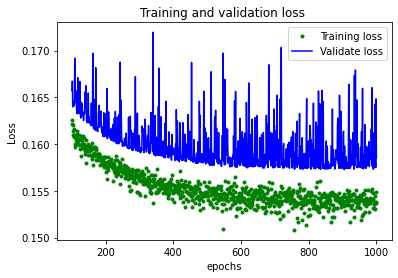

In [ ]:
SKIP = 100
plt.plot(epochs[SKIP:] , loss[SKIP:] , 'g.',label = "Training loss")
plt.plot(epochs[SKIP:] , val_loss[SKIP:] , "b", label = "Validate loss")
plt.title("Training and validation loss ")
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

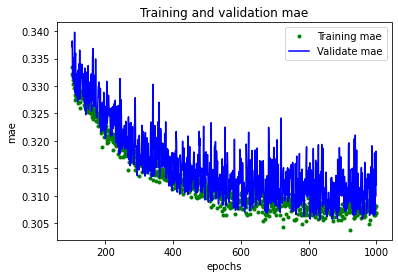

In [ ]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:] , mae[SKIP:] , 'g.',label = "Training mae")
plt.plot(epochs[SKIP:] , val_mae[SKIP:] , "b", label = "Validate mae")
plt.title("Training and validation mae")
plt.xlabel("epochs")
plt.ylabel('mae')
plt.legend()
plt.show()

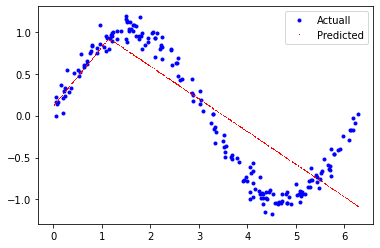

In [ ]:
predictions = model_1.predict(x_train)
plt.clf()
plt.plot(x_test,y_test , 'b.',label = "Actuall")
plt.plot(x_train , predictions , 'r,',label = 'Predicted')
plt.legend()
plt.show()


In [ ]:
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(16,activation= "relu",input_shape = (1,)))
model_2.add(tf.keras.layers.Dense(16,activation= "relu"))
model_2.add(tf.keras.layers.Dense(1))
model_2.compile(optimizer ='rmsprop', loss = 'mse',metrics =['mae'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model_2.fit(x_train , y_train , epochs= 600 ,batch_size=  16 , validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 5ms/step - loss: 0.3880 - mae: 0.5393 - val_loss: 0.3706 - val_mae: 0.5270
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3253 - mae: 0.4967 - val_loss: 0.3214 - val_mae: 0.4834
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2786 - mae: 0.4605 - val_loss: 0.2745 - val_mae: 0.4521
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2427 - mae: 0.4312 - val_loss: 0.2391 - val_mae: 0.4225
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2155 - mae: 0.4081 - val_loss: 0.2103 - val_mae: 0.3973
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1945 - mae: 0.3874 - val_loss: 0.1985 - val_mae: 0.3812
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1836 - mae: 0.3746 - val_loss: 0.1893 - val_mae: 0.3770
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1763 - m

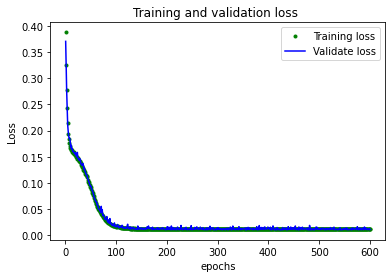

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1,len(loss) +1)
plt.plot(epochs , loss , 'g.',label = "Training loss")
plt.plot(epochs , val_loss , "b", label = "Validate loss")
plt.title("Training and validation loss ")
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

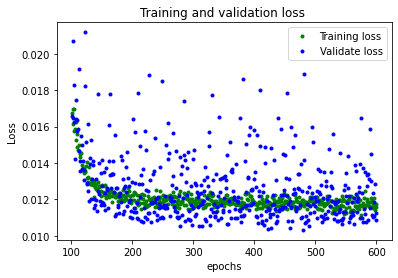

In [ ]:
SKIP = 100
plt.plot(epochs[SKIP:] , loss[SKIP:] , 'g.',label = "Training loss")
plt.plot(epochs[SKIP:] , val_loss[SKIP:] , "b.", label = "Validate loss")
plt.title("Training and validation loss ")
plt.xlabel("epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()